# DATATHON CODE FOR RYAN FROM GROUP BLACK CROWS 

## The Team 
  1. Vicente LLobell 
  2. Sumanth Reddy S
  3. Kristian Kaz 
  4. Axel Reznik
  
We were given data by Ryanair. The data consisted 4 different aspects, 
1. Flight information 
2. Timing and duration 
3. Passenger demographics 
4. Booking details. 

The objective was to provide recommendations for flight department on fresh product loading for planes, planned lines of flying. So this is how we are going to target and do our code for the prediction.

In [1]:
## Import The Libraries 

**Loading of the Data Provided**
1. Train test excel
2. Real vs planned lofs of 1 year excel 
3. Predict novemeber csv

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.base import clone
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler, MinMaxScaler
from category_encoders import OneHotEncoder, MEstimateEncoder, CatBoostEncoder

import warnings
warnings.filterwarnings('ignore') # to supress the display of warnings 

In [59]:
train_set = pd.read_csv("train_test.csv")
test_set = pd.read_csv("predict_november.csv")

# to read data from the each sheet of the excel 

planned_route = pd.read_excel("real vs planned lofs_1_year.xlsx", sheet_name = "planned rim lof ") 
actual_route = pd.read_excel("real vs planned lofs_1_year.xlsx", sheet_name = "real netline lof")

**Exploratory Data Analysis**
1. Discover the Data
2. Find a Target Variable 
3. Splitting of the data 

In [60]:
print(f"The Shape of the Training Set: {train_set.shape}\n")
print(f"The Shape of the Test Set: {test_set.shape}\n")
print(f"The Shape of the Planned Routes Set: {planned_route.shape}\n")
print(f"The Shape of the Actual Set: {actual_route.shape}")

The Shape of the Training Set: (968876, 61)

The Shape of the Test Set: (64481, 55)

The Shape of the Planned Routes Set: (202462, 4)

The Shape of the Actual Set: (199729, 5)


In [61]:
print(f"Number of Unique Values in the Train Set: {train_set.nunique().sum()}")
print(f"Number of Unique Values in the Test Set: {test_set.nunique().sum()}")
print(f"Number of Unique Values in the Planned Routes Set: {planned_route.nunique().sum()}")
print(f"Number of Unique Values in the Actual Routes Set: {actual_route.nunique().sum()}")

Number of Unique Values in the Train Set: 1408006
Number of Unique Values in the Test Set: 118476
Number of Unique Values in the Planned Routes Set: 38247
Number of Unique Values in the Actual Routes Set: 365752


In [62]:
## we print the info of each data set to find the coulumn and find a way to split the data 

train_set.info()
test_set.info()
planned_route.info()
actual_route.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968876 entries, 0 to 968875
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   st_flight_id                968876 non-null  object 
 1   st_departure_airport        968876 non-null  object 
 2   st_arrival_airport          968876 non-null  object 
 3   st_departure_city           926407 non-null  object 
 4   st_arrival_city             926401 non-null  object 
 5   st_departure_country        926407 non-null  object 
 6   st_arrival_country          926401 non-null  object 
 7   st_route_group              968749 non-null  object 
 8   st_route_subgroup           968749 non-null  object 
 9   dt_flight_date              968876 non-null  int64  
 10  qt_departure_local_time     968876 non-null  int64  
 11  qt_arrival_local_time       968876 non-null  int64  
 12  qt_flight_duration          968876 non-null  float64
 13  qt_month_depar

In [63]:
train_set.columns

Index(['st_flight_id', 'st_departure_airport', 'st_arrival_airport',
       'st_departure_city', 'st_arrival_city', 'st_departure_country',
       'st_arrival_country', 'st_route_group', 'st_route_subgroup',
       'dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_adult', 'qt_total_teen',
       'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike',
       'qt_total_bulk', 'qt_total_music', 'qt_total_sportother',
       'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings',
       'qt_total_1male', 'qt_total_1female', 'qt_total_2males',
       'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus',
       

In [64]:
test_set.columns

Index(['st_flight_id', 'st_departure_airport', 'st_arrival_airport',
       'st_departure_city', 'st_arrival_city', 'st_departure_country',
       'st_arrival_country', 'st_route_group', 'st_route_subgroup',
       'dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time',
       'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure',
       'qt_total_passengers', 'qt_total_adult', 'qt_total_teen',
       'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female',
       'vl_mean_people_booking', 'vl_max_people_booking',
       'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway',
       'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike',
       'qt_total_bulk', 'qt_total_music', 'qt_total_sportother',
       'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings',
       'qt_total_1male', 'qt_total_1female', 'qt_total_2males',
       'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus',
       

In [65]:
# since our project is on prediction on food we use the 6 food variables 

target_list = ['Ham_Cheese_Panini_qt', 'Chicken_Seeded_Panini_qt',
               'Ham_Cheese_Croissant_qt', 'Fresh_Sandwich_qt', 'Choc_Croissant_qt',
               'Bacon_Baguette_qt']

In [66]:
# Numerical and Categorical Features
# we drop the the target lsit from the numerical data list 

numerical_features = list(train_set._get_numeric_data())
categorical_features = list(train_set.drop(numerical_features, axis = 1))

numerical_features = [feature for feature in numerical_features if feature not in target_list]
print(numerical_features)
print(categorical_features)

['dt_flight_date', 'qt_departure_local_time', 'qt_arrival_local_time', 'qt_flight_duration', 'qt_month_departure', 'qt_dayofweek_departure', 'qt_total_passengers', 'qt_total_adult', 'qt_total_teen', 'qt_total_child', 'qt_total_infant', 'qt_total_male', 'qt_total_female', 'vl_mean_people_booking', 'vl_max_people_booking', 'qt_outbound_passengers', 'qt_return_passengers', 'qt_passenger_oneway', 'qt_total_bags', 'qt_total_golf', 'qt_total_ski', 'qt_total_bike', 'qt_total_bulk', 'qt_total_music', 'qt_total_sportother', 'qt_total_plus', 'qt_total_flexiplus', 'qt_total_bookings', 'qt_total_1male', 'qt_total_1female', 'qt_total_2males', 'qt_total_2females', 'qt_total_3males_plus', 'qt_total_3females_plus', 'qt_total_3malefemale_mixed', 'qt_total_rest_composition', 'AC_LOGICAL_NO', 'FN_NUMBER', 'dep_delay']
['st_flight_id', 'st_departure_airport', 'st_arrival_airport', 'st_departure_city', 'st_arrival_city', 'st_departure_country', 'st_arrival_country', 'st_route_group', 'st_route_subgroup', '

In [67]:
#seperating each into a different data frame 
# with a function



In [68]:
def describe_dataframe(df):
    
    # Basic description including count, unique values, top (most common) value, and frequency of top value
    basic_desc = df.describe(include='all').transpose()
    
    # Adding data type, number of unique values, percentage of unique values, and null statistics
    extended_desc = pd.DataFrame({
        'dtype': df.dtypes,
        'nunique': df.nunique(),
        '%unique': df.nunique() / df.shape[0] * 100,
        'null': df.isnull().sum(),
        '%null': df.isnull().sum() / df.shape[0] * 100
    })
    
    # Merging basic and extended descriptions
    full_desc = basic_desc.join(extended_desc, how='outer')
    
    # Adding min and max for numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    full_desc.loc[numeric_cols, 'min'] = df[numeric_cols].min()
    full_desc.loc[numeric_cols, 'max'] = df[numeric_cols].max()
    
    return full_desc

# Example usage
train_set_description = describe_dataframe(train_set) 
test_set_description = describe_dataframe(test_set)

train_set_description = train_set_description.drop(["top","freq","mean","std","25%","50%","75%"] ,axis=1)
test_set_description = test_set_description.drop(["top","freq","mean","std","25%","50%","75%"],axis=1 )

In [69]:
train_set_description

,count,unique,min,max,dtype,nunique,%unique,null,%null
st_flight_id,968876,968876,NaN,NaN,object,968876,100.000000,0,0.000000
st_departure_airport,968876,242,NaN,NaN,object,242,0.024977,0,0.000000
st_arrival_airport,968876,245,NaN,NaN,object,245,0.025287,0,0.000000
st_departure_city,926407,196,NaN,NaN,object,196,0.020230,42469,4.383327
st_arrival_city,926401,197,NaN,NaN,object,197,0.020333,42475,4.383946
...,...,...,...,...,...,...,...,...,...
Chicken_Seeded_Panini_qt,613453.0,NaN,0.0,27.0,float64,27,0.002787,355423,36.684055
Ham_Cheese_Croissant_qt,613453.0,NaN,0.0,36.0,float64,21,0.002167,355423,36.684055
Fresh_Sandwich_qt,613453.0,NaN,0.0,45.0,float64,37,0.003819,355423,36.684055
Choc_Croissant_qt,613453.0,NaN,0.0,24.0,float64,14,0.001445,355423,36.684055


In [70]:
test_set_description

,count,unique,min,max,dtype,nunique,%unique,null,%null
st_flight_id,64481,64481,NaN,NaN,object,64481,100.000000,0,0.000000
st_departure_airport,64481,217,NaN,NaN,object,217,0.336533,0,0.000000
st_arrival_airport,64481,218,NaN,NaN,object,218,0.338084,0,0.000000
st_departure_city,61335,180,NaN,NaN,object,180,0.279152,3146,4.878957
st_arrival_city,61340,181,NaN,NaN,object,181,0.280703,3141,4.871202
st_departure_country,61335,33,NaN,NaN,object,33,0.051178,3146,4.878957
st_arrival_country,61340,33,NaN,NaN,object,33,0.051178,3141,4.871202
st_route_group,64480,6,NaN,NaN,object,6,0.009305,1,0.001551
st_route_subgroup,64480,46,NaN,NaN,object,46,0.071339,1,0.001551
dt_flight_date,64481.0,NaN,20231101.0,20231130.0,int64,30,0.046525,0,0.000000


In [71]:
# Drop the st_flight_id Column

train_set = train_set.drop("st_flight_id", axis=1)
test_set = test_set.drop("st_flight_id", axis=1)

categorical_features.remove("st_flight_id")

In [72]:
train_set.duplicated().sum()

0

In [73]:
# Check NaN Values in the Dependent Variables

nan_rows = train_set[target_list].isnull().any(axis=1)
train_set_with_nan = train_set[nan_rows]

train_set_with_nan.shape

(355423, 60)

In [74]:
# Drop the Rows where there are NaN Values

train_set = train_set.dropna(subset=target_list)
train_set


,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,qt_departure_local_time,...,Lof_ID,FN_NUMBER,Flight_n,dep_delay,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,BCN,MXP,Barcelona,Milan,Spain,Italy,CITY,ESPT-IT,20230729,18,...,2023.07.29_12AL38Q,7541,FR7541,10.0,2.0,2.0,0.0,0.0,0.0,0.0
1,DUB,CPH,Dublin,Copenhagen,Ireland,Denmark,CITY,IE CITY,20230301,6,...,2023.03.01_206FR738,5070,FR5070,-8.0,2.0,2.0,0.0,0.0,1.0,0.0
2,VNO,LBA,Vilnius,Leeds,Lithuania,United Kingdom,CITY,LON CITY,20221026,14,...,2022.10.26_348FR738,5044,FR5044,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,STN,PLQ,London,Palanga,United Kingdom,Lithuania,ETHNIC,E EUR UKIE,20221129,13,...,2022.11.29_323FR738,2652,FR2652,-3.0,2.0,1.0,0.0,1.0,0.0,0.0
7,TFS,DUB,Tenerife,Dublin,Spain,Ireland,CANARY,UKIE CANARY,20230116,12,...,2023.01.16_546FR738,5556,FR5556,-7.0,5.0,11.0,2.0,5.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968871,AOI,STN,Ancona,London,Italy,United Kingdom,CITY,LON CITY,20230403,18,...,2023.04.03_141FR738,125,FR125,NaN,4.0,1.0,0.0,3.0,0.0,1.0
968872,VRN,CAG,Verona,Caligari,Italy,Italy,DOMESTIC,IT DOM,20230826,16,...,2023.08.26_105AL73Q,322,FR322,NaN,2.0,0.0,0.0,0.0,0.0,0.0
968873,BLQ,MAN,Bologna,Manchester,Italy,United Kingdom,CITY,UK REG CITY,20230617,16,...,2023.06.17_352FR738,2241,FR2241,27.0,3.0,2.0,0.0,1.0,0.0,1.0
968874,REU,LPL,Reus,Liverpool,Spain,United Kingdom,LEISURE,UK REG LEISURE,20230718,13,...,2023.07.18_1FR738,9825,FR9825,26.0,7.0,2.0,0.0,2.0,0.0,0.0


In [75]:
train_set.shape

(613453, 60)

**EDA Dependent Variables**

In [76]:
target_list 

['Ham_Cheese_Panini_qt',
 'Chicken_Seeded_Panini_qt',
 'Ham_Cheese_Croissant_qt',
 'Fresh_Sandwich_qt',
 'Choc_Croissant_qt',
 'Bacon_Baguette_qt']

In [77]:
target_list 

# Creating a DataFrame Consisting Only of the Target Columns
dependents_set = train_set[target_list]


In [78]:
dependents_set

,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,2.0,2.0,0.0,0.0,0.0,0.0
1,2.0,2.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,0.0,0.0
7,5.0,11.0,2.0,5.0,0.0,6.0
...,...,...,...,...,...,...
968871,4.0,1.0,0.0,3.0,0.0,1.0
968872,2.0,0.0,0.0,0.0,0.0,0.0
968873,3.0,2.0,0.0,1.0,0.0,1.0
968874,7.0,2.0,0.0,2.0,0.0,0.0


In [79]:
train_set_description = describe_dataframe(dependents_set)

train_set_description = train_set_description.drop(["mean","std","25%","50%","75%"] ,axis=1)
train_set_description

,count,min,max,dtype,nunique,%unique,null,%null
Ham_Cheese_Panini_qt,613453.0,0.0,88.0,float64,49,0.007988,0,0.0
Chicken_Seeded_Panini_qt,613453.0,0.0,27.0,float64,27,0.004401,0,0.0
Ham_Cheese_Croissant_qt,613453.0,0.0,36.0,float64,21,0.003423,0,0.0
Fresh_Sandwich_qt,613453.0,0.0,45.0,float64,37,0.006031,0,0.0
Choc_Croissant_qt,613453.0,0.0,24.0,float64,14,0.002282,0,0.0
Bacon_Baguette_qt,613453.0,0.0,32.0,float64,23,0.003749,0,0.0


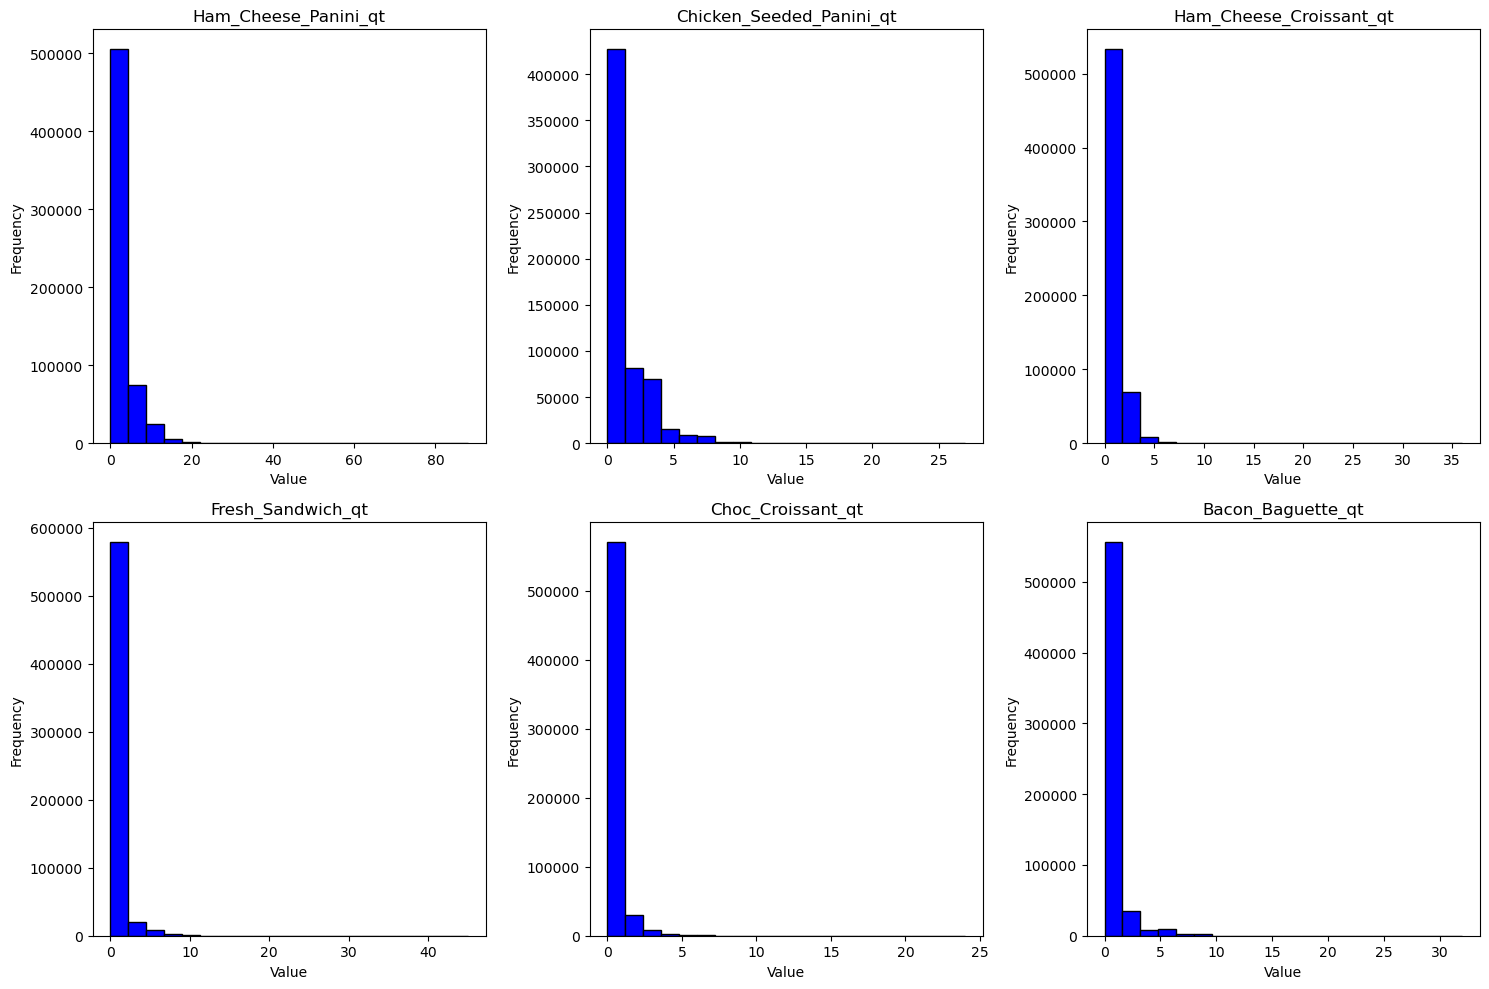

In [80]:
# histogram of the target list 

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, target in enumerate(target_list):
    axs[i].hist(dependents_set[target].dropna(), bins=20, color='blue', edgecolor='black')
    axs[i].set_title(target)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

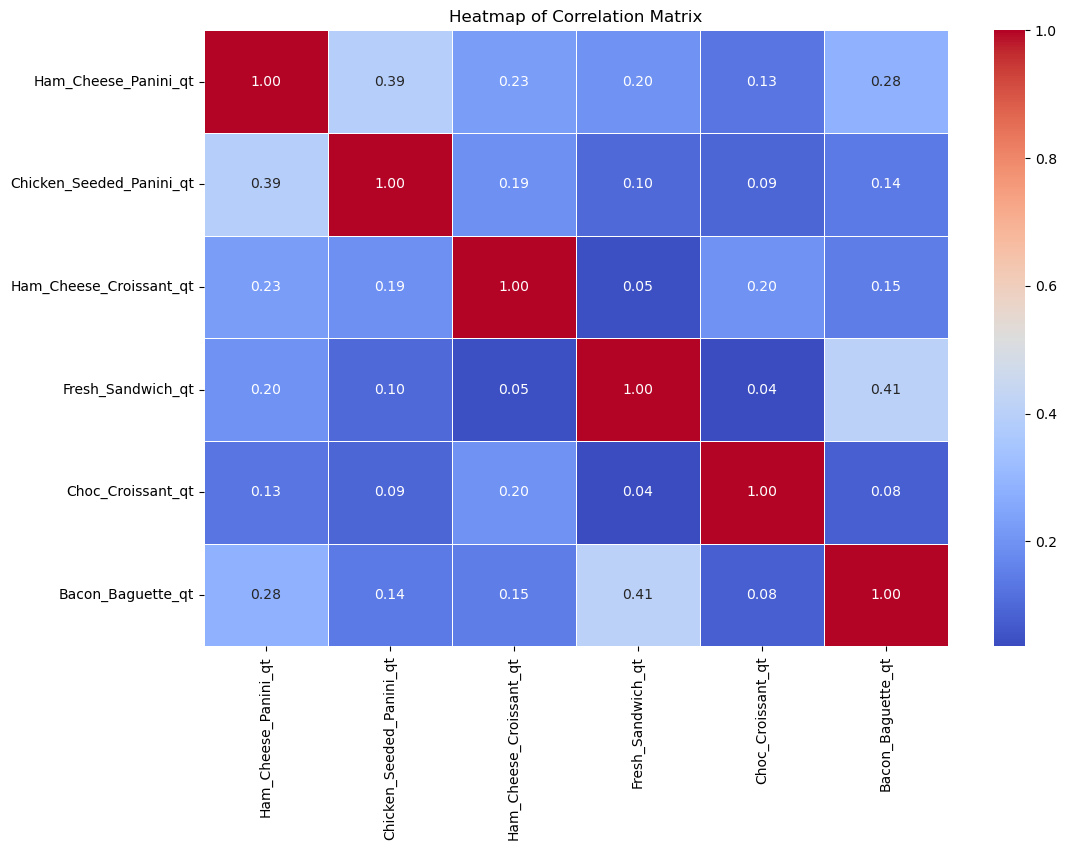

In [81]:
# corelation matrix of target list variables 

correlation_matrix = train_set[target_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**EDA Independent Variables**

In [82]:
print("The Numeric features are as follows ")
numerical_features

The Numeric features are as follows 


['dt_flight_date',
 'qt_departure_local_time',
 'qt_arrival_local_time',
 'qt_flight_duration',
 'qt_month_departure',
 'qt_dayofweek_departure',
 'qt_total_passengers',
 'qt_total_adult',
 'qt_total_teen',
 'qt_total_child',
 'qt_total_infant',
 'qt_total_male',
 'qt_total_female',
 'vl_mean_people_booking',
 'vl_max_people_booking',
 'qt_outbound_passengers',
 'qt_return_passengers',
 'qt_passenger_oneway',
 'qt_total_bags',
 'qt_total_golf',
 'qt_total_ski',
 'qt_total_bike',
 'qt_total_bulk',
 'qt_total_music',
 'qt_total_sportother',
 'qt_total_plus',
 'qt_total_flexiplus',
 'qt_total_bookings',
 'qt_total_1male',
 'qt_total_1female',
 'qt_total_2males',
 'qt_total_2females',
 'qt_total_3males_plus',
 'qt_total_3females_plus',
 'qt_total_3malefemale_mixed',
 'qt_total_rest_composition',
 'AC_LOGICAL_NO',
 'FN_NUMBER',
 'dep_delay']

In [83]:
print("The Categorical features are as follows ")
categorical_features

The Categorical features are as follows 


['st_departure_airport',
 'st_arrival_airport',
 'st_departure_city',
 'st_arrival_city',
 'st_departure_country',
 'st_arrival_country',
 'st_route_group',
 'st_route_subgroup',
 'DAY_OF_ORIGIN',
 'DEP_SCHED_DT',
 'ARR_SCHED_DT',
 'FN_CARRIER',
 'Base',
 'Lof_ID',
 'Flight_n']

**SPLITTING OF THE DATA INTO X,Y**

In [120]:
X = train_set.drop(columns=target_list)
y = train_set[target_list]

import pandas as pd

# Assuming your data is stored in a DataFrame named 'data'

# Identify the column with the NaN value (replace 'column_name' with the actual column name)
X = X.fillna('missing_value')  # Replace 'missing_value' with a desired string




print("DATA OF X")
X



DATA OF X


,st_departure_airport,st_arrival_airport,st_departure_city,st_arrival_city,st_departure_country,st_arrival_country,st_route_group,st_route_subgroup,dt_flight_date,qt_departure_local_time,...,DAY_OF_ORIGIN,DEP_SCHED_DT,ARR_SCHED_DT,FN_CARRIER,AC_LOGICAL_NO,Base,Lof_ID,FN_NUMBER,Flight_n,dep_delay
0,BCN,MXP,Barcelona,Milan,Spain,Italy,CITY,ESPT-IT,20230729,18,...,2023-07-29,2023-07-29 16:30,2023-07-29 18:15,FR,12,MXP,2023.07.29_12AL38Q,7541,FR7541,10.0
1,DUB,CPH,Dublin,Copenhagen,Ireland,Denmark,CITY,IE CITY,20230301,6,...,2023-03-01,2023-03-01 06:10,2023-03-01 08:20,FR,206,DUB,2023.03.01_206FR738,5070,FR5070,-8.0
2,VNO,LBA,Vilnius,Leeds,Lithuania,United Kingdom,CITY,LON CITY,20221026,14,...,2022-10-26,2022-10-26 11:40,2022-10-26 14:35,FR,348,LBA,2022.10.26_348FR738,5044,FR5044,0.0
5,STN,PLQ,London,Palanga,United Kingdom,Lithuania,ETHNIC,E EUR UKIE,20221129,13,...,2022-11-29,2022-11-29 13:30,2022-11-29 15:45,FR,323,STN,2022.11.29_323FR738,2652,FR2652,-3.0
7,TFS,DUB,Tenerife,Dublin,Spain,Ireland,CANARY,UKIE CANARY,20230116,12,...,2023-01-16,2023-01-16 12:30,2023-01-16 16:50,FR,546,DUB,2023.01.16_546FR738,5556,FR5556,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968871,AOI,STN,Ancona,London,Italy,United Kingdom,CITY,LON CITY,20230403,18,...,2023-04-03,2023-04-03 16:10,2023-04-03 18:30,FR,141,STN,2023.04.03_141FR738,125,FR125,missing_value
968872,VRN,CAG,Verona,Caligari,Italy,Italy,DOMESTIC,IT DOM,20230826,16,...,2023-08-26,2023-08-26 14:35,2023-08-26 16:00,FR,105,CAG,2023.08.26_105AL73Q,322,FR322,missing_value
968873,BLQ,MAN,Bologna,Manchester,Italy,United Kingdom,CITY,UK REG CITY,20230617,16,...,2023-06-17,2023-06-17 14:15,2023-06-17 16:45,FR,352,MAN,2023.06.17_352FR738,2241,FR2241,27.0
968874,REU,LPL,Reus,Liverpool,Spain,United Kingdom,LEISURE,UK REG LEISURE,20230718,13,...,2023-07-18,2023-07-18 11:50,2023-07-18 14:10,FR,1,EDI,2023.07.18_1FR738,9825,FR9825,26.0


In [85]:
print("DATA OF y")
y

DATA OF y


,Ham_Cheese_Panini_qt,Chicken_Seeded_Panini_qt,Ham_Cheese_Croissant_qt,Fresh_Sandwich_qt,Choc_Croissant_qt,Bacon_Baguette_qt
0,2.0,2.0,0.0,0.0,0.0,0.0
1,2.0,2.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,0.0,0.0
7,5.0,11.0,2.0,5.0,0.0,6.0
...,...,...,...,...,...,...
968871,4.0,1.0,0.0,3.0,0.0,1.0
968872,2.0,0.0,0.0,0.0,0.0,0.0
968873,3.0,2.0,0.0,1.0,0.0,1.0
968874,7.0,2.0,0.0,2.0,0.0,0.0


In [86]:
# Creating 6 Different Target Variables

y_ham_cheese_panini = y.loc[:, "Ham_Cheese_Panini_qt"]
y_chicken_seed_panini = y.loc[:, "Chicken_Seeded_Panini_qt"]
y_ham_cheese_croissant_croissant = y.loc[:, "Ham_Cheese_Croissant_qt"]
y_fresh_sandwich = y.loc[:, "Fresh_Sandwich_qt"]
y_choc_croissant = y.loc[:, "Choc_Croissant_qt"]
y_bacon_baguette = y.loc[:, "Bacon_Baguette_qt"]

In [88]:
score_list, oof_list, predict_list = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd  # Assuming you are using pandas DataFrame for X and y.
from sklearn.model_selection import KFold
from sklearn.base import clone
import optuna



def cross_val_model(estimators, X, y, test_set, cv, verbose=True):
    val_scores_mse = []
    val_scores_mae = []
    val_scores_mape = []
    val_preds = np.zeros(len(X))
    test_preds = np.zeros(len(test_set))

    for fold, (train_ind, val_ind) in enumerate(cv.split(X)):
        model = clone(estimators)

        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

        model.fit(X_train, y_train)

        val_pred = model.predict(X_val)
        val_preds[val_ind] = val_pred
        
        mse = mean_squared_error(y_val, val_pred)
        mae = mean_absolute_error(y_val, val_pred)
        mape = np.mean(np.abs((y_val - val_pred) / y_val)) * 100

        test_fold_pred = model.predict(test_set)
        test_preds += test_fold_pred / cv.n_splits

        if verbose:
            print("-" * 100)
            print(f"Fold: {fold}")
            print(f"Validation MSE Score: {mse}")
            print(f"Validation MAE Score: {mae}")
            print(f"Validation MAPE Score: {mape}")
            print("-" * 100)

        val_scores_mse.append(mse)
        val_scores_mae.append(mae)
        val_scores_mape.append(mape)

    if verbose:
        print(f"Average Validation MSE Score: {np.mean(val_scores_mse)}")
        print(f"Average Validation MAE Score: {np.mean(val_scores_mae)}")
        print(f"Average Validation MAPE Score: {np.mean(val_scores_mape)}")

    return val_scores_mse, val_scores_mae, val_scores_mape, val_preds, test_preds


In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import numpy as np
import optuna

n_splits = 10
kf = KFold(n_splits=n_splits)

def cross_val_model(estimators, X, y, test_set, cv, verbose=True):
    val_scores = []
    val_preds = np.zeros(len(X))
    test_preds = np.zeros(len(test_set))

    for fold, (train_ind, val_ind) in enumerate(cv.split(X)):
        model = clone(estimators)

        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

        model.fit(X_train, y_train)

        val_pred = model.predict(X_val)
        val_preds[val_ind] = val_pred
        mse = mean_squared_error(y_val, val_pred)

        test_fold_pred = model.predict(test_set)
        test_preds += test_fold_pred / cv.n_splits

        if verbose:
            print("-" * 100)
            print(f"Fold: {fold}")
            print(f"Validation MSE Score: {mse}")
            print("-" * 100)

        val_scores.append(mse)

    if verbose:
        print(f"Average Validation MSE Score: {np.mean(val_scores)}")

    return val_scores, val_preds, test_preds

**Model**

**XGBoost Model**

In [123]:
from sklearn.preprocessing import OneHotEncoder

# Assuming X contains your categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

##best_catboost_model = CatBoostRegressor(**best_params, random_seed=42)
##best_catboost_model.fit(X_encoded, y_ham_cheese_panini)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [122]:
def catboost_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 1, 16),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-9, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'random_strength': trial.suggest_float('random_strength', 0.0, 100.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    catboost_model = CatBoostRegressor(**params, random_seed=42)

    val_scores_mse, val_scores_mae, val_scores_mape, val_preds, test_preds = cross_val_model(catboost_model, X, y_ham_cheese_panini, test_set, kf, verbose=False)

    return np.mean(val_scores_mse)

catboost_study = optuna.create_study(direction='minimize')
catboost_study.optimize(catboost_objective, n_trials=100)

best_params = catboost_study.best_params
best_score = catboost_study.best_value

print("Best Hyperparameters:", best_params)
print("Best Mean Validation MSE Score:", best_score)

[I 2024-03-01 10:08:33,355] A new study created in memory with name: no-name-53d3b319-7cfc-4adb-a6af-56b49bcf03d3
[W 2024-03-01 10:08:33,732] Trial 0 failed with parameters: {'iterations': 1697, 'learning_rate': 0.7763958953220994, 'depth': 15, 'l2_leaf_reg': 1.4678143422360883e-08, 'bagging_temperature': 1.363172264752761, 'border_count': 244, 'random_strength': 38.34679456988498, 'od_type': 'Iter', 'od_wait': 27} because of the following error: CatBoostError('Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="CAG": Cannot convert \'b\'CAG\'\' to float').
Traceback (most recent call last):
  File "_catboost.pyx", line 2309, in _catboost.get_float_feature
  File "_catboost.pyx", line 1142, in _catboost._FloatOrNan
  File "_catboost.pyx", line 952, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'CAG'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-pac

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="CAG": Cannot convert 'b'CAG'' to float

In [102]:
from catboost import CatBoostRegressor
# Assuming X is your features DataFrame and all features are categorical
categorical_features_indices = list(range(X.shape[1]))

# Basic CatBoost model setup
catboost_model_basic = CatBoostRegressor(
    iterations=100,  # Start with a low iteration count for faster experimentation
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=20,
    cat_features=categorical_features_indices  # Specify your categorical features indices here
)


In [104]:
from sklearn.model_selection import KFold


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the basic model (ensure the function is properly defined to handle CatBoost models)
val_scores_mse, val_scores_mae, val_scores_mape, val_preds, test_preds = cross_val_model(
    catboost_model_basic, X, y, test_set, cv
)


CatBoostError: Invalid type for cat_feature[non-default value idx=10,feature_idx=2]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [96]:
def xgb_objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'gamma' : trial.suggest_float('gamma', 1e-9, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 24),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
    }

    xgb_model = make_pipeline(
        MEstimateEncoder(cols=categorical_features),
        XGBRegressor(**params, random_state=42)
    )

    val_scores, _, _ = cross_val_model(xgb_model, X, y_ham_cheese_panini, test_set, kf, verbose=False)

    return np.mean(val_scores)

xgb_study = optuna.create_study(direction='minimize')

[I 2024-03-01 09:30:59,676] A new study created in memory with name: no-name-36fda15b-c3d5-4bab-8a3e-9699462d45aa


In [94]:
TUNE = True

if TUNE:
    xgb_study.optimize(xgb_objective, 10)


"[I 2024-02-28 20:48:15,891] Trial 2 finished with value: 4.867661855092419e+34 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 1099, 'learning_rate': 0.9915569700906465, 'gamma': 0.8919117403744115, 'subsample': 0.41608947246825356, 'colsample_bytree': 0.3719050649893853, 'max_depth': 22, 'min_child_weight': 3, 'reg_lambda': 4.497397110494663e-06, 'reg_alpha': 2.698661838055659e-07}. Best is trial 0 with value: 9.674193046809174."

[W 2024-03-01 09:20:09,794] Trial 1 failed with parameters: {'grow_policy': 'depthwise', 'n_estimators': 1683, 'learning_rate': 0.80521163298528, 'gamma': 0.36288081223130964, 'subsample': 0.7676290995290858, 'colsample_bytree': 0.9084480629228797, 'max_depth': 4, 'min_child_weight': 24, 'reg_lambda': 7.978983487918666e-07, 'reg_alpha': 2.4073189564616375} because of the following error: ValueError('too many values to unpack (expected 3)').
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/zg/j_jrr3gn6vj59px9ztswr8h40000gn/T/ipykernel_71475/3840150914.py", line 20, in xgb_objective
    val_scores, _, _ = cross_val_model(xgb_model, X, y_ham_cheese_panini, test_set, kf, verbose=False)
ValueError: too many values to unpack (expected 3)
[W 2024-03-01 09:20:09,797] Trial 1 failed with value None.


ValueError: too many values to unpack (expected 3)

In [91]:
best_params = xgb_study.best_params
print(best_params)

ValueError: No trials are completed yet.

In [ ]:
XGB = make_pipeline(
    MEstimateEncoder(cols=categorical_features),
    XGBClassifier(**best_params,seed=seed)
)

In [ ]:
# Train the Model

val_scores, val_predictions, test_predictions = cross_val_model(XGB, X, y)

for k,v in mapping.items():
    oof_list[f"xgb_{k}"] = val_predictions[:,v]

for k,v in mapping.items():
    predict_list[f"xgb_{k}"] = test_predictions[:,v]